# Logistic Regression

If you recall Linear Regression, it is used to determine the value of a continuous dependent variable. Logistic Regression is generally used for classification purposes. Unlike Linear Regression, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical. When the number of possible outcomes is only two it is called Binary Logistic Regression.

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Simply we can say that Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X.

#### We can also say that the target variable is categorical. Based on the number of categories, Logistic regression can be classified as:

1. binomial: target variable can have only 2 possible types: “0” or “1” which may represent “win” vs “loss”, “pass” vs “fail”, “dead” vs “alive”, etc.

2. multinomial: target variable can have 3 or more possible types which are not ordered(i.e. types have no quantitative significance) like “disease A” vs “disease B” vs “disease C”.

3. ordinal: it deals with target variables with ordered categories. For example, a test score can be categorized as:“very poor”, “poor”, “good”, “very good”. Here, each category can be given a score like 0, 1, 2, 3.

### Logistic Regression Assumptions

1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

First of all, we explore the simplest form of Logistic Regression, i.e Binomial Logistic Regression.

### Binomial Logistic Regression

Consider an example dataset which maps the number of hours of study with the result of an exam. The result can take only two values, namely passed(1) or failed(0):

In [20]:
import csv 
import numpy as np 
import matplotlib.pyplot as plt 

In [21]:
def loadCSV(filename):
    ''' 
    function to load dataset 
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader(csvfile) 
        dataset = list(lines) 
        for i in range(len(dataset)): 
            dataset[i] = [float(x) for x in dataset[i]]      
    return np.array(dataset)

In [22]:
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 

In [23]:
def logistic_func(beta, X): 
    ''' 
    logistic(sigmoid) function 
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 

In [24]:
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 

In [25]:
def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 

In [15]:
def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter  

In [26]:
def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value)

In [27]:
def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show()

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


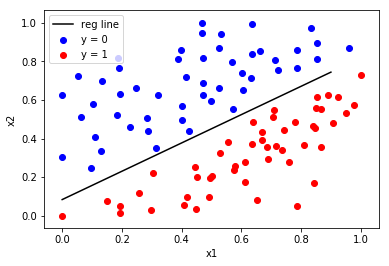

In [56]:
if __name__ == "__main__": 
    # load the dataset 
    dataset = loadCSV('D:\\dataset\\data1.csv') 
      
    # normalizing feature matrix 
    X = normalize(dataset[:, :-1]) 
      
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
  
    # response vector 
    y = dataset[:, -1] 
  
    # initial beta values 
    beta = np.matrix(np.zeros(X.shape[1])) 
  
    # beta values after running gradient descent 
    beta, num_iter = grad_desc(X, y, beta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", beta) 
    print("No. of iterations:", num_iter) 
  
    # predicted labels 
    y_pred = pred_values(beta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 
      
    # plotting regression line 
    plot_reg(X, y, beta) 

### Use SciKit Learn

In [31]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
data = pd.read_csv("D:\\dataset\\data1.csv", index_col=None, header = None)
data.shape

(100, 3)

In [102]:
data.head()

,0,1,2
0,4.5192,2.6487,1
1,2.4443,1.5438,1
2,4.2409,1.8990,1
3,5.8097,2.4711,1
4,6.4423,3.3590,1


In [104]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [105]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [106]:
logr.fit(X,y)

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
from sklearn.metrics import accuracy_score 
predicted_classes = logr.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = logr.coef_

In [108]:
accuracy

1.0

In [109]:
parameters

array([[ 1.82472891, -2.29212899]])

In [110]:
predicted_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)